In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/CHD Summarized Inpatient Data v4-2 2.csv')

In [2]:
df.shape

(63957, 5)

In [3]:
print(df.columns)

Index(['YEAR_QTR', 'FAC_COUNTY', 'AGE_GROUP', 'Count', 'Unnamed: 4'], dtype='object')


In [4]:
print(df.isnull().sum())

YEAR_QTR          0
FAC_COUNTY        0
AGE_GROUP         0
Count             0
Unnamed: 4    63957
dtype: int64


In [5]:
print(df.dtypes)

YEAR_QTR       object
FAC_COUNTY      int64
AGE_GROUP      object
Count           int64
Unnamed: 4    float64
dtype: object


In [6]:
df.head()

,YEAR_QTR,FAC_COUNTY,AGE_GROUP,Count,Unnamed: 4
0,2000 Q1,1,15-19,3,NaN
1,2000 Q1,1,40-44,10,NaN
2,2000 Q1,1,30-34,7,NaN
3,2000 Q1,1,70-74,10,NaN
4,2000 Q1,1,45-49,16,NaN


In [7]:
grouped_df = df.groupby(['FAC_COUNTY', 'YEAR_QTR'])['Count'].sum().reset_index()

print(grouped_df)


      FAC_COUNTY YEAR_QTR  Count
0              1  2000 Q1    133
1              1  2000 Q2    167
2              1  2000 Q3    198
3              1  2000 Q4    183
4              1  2001 Q1    185
...          ...      ...    ...
5388          67  2024 Q3     68
5389          99  2004 Q1     20
5390          99  2004 Q2     34
5391          99  2004 Q3     17
5392          99  2004 Q4     23

[5393 rows x 3 columns]


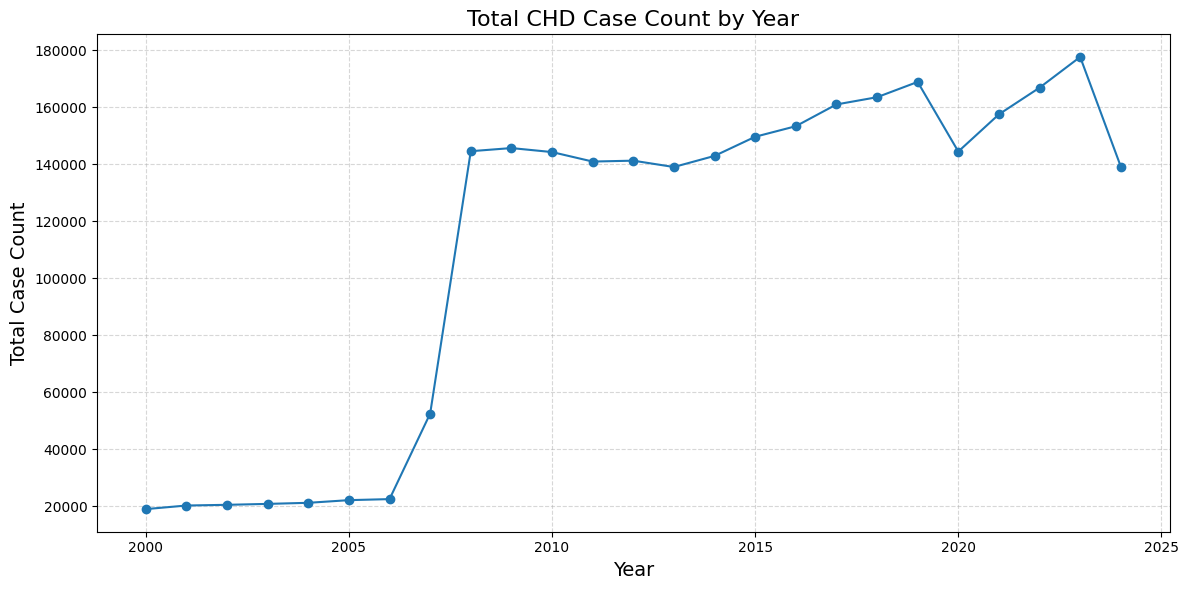

In [8]:
# Ensure YEAR_QTR is a string
df["Year"] = df["YEAR_QTR"].astype(str).str.extract(r'(\d{4})')

# Group by year and sum counts across counties
yearly_counts = df.groupby("Year")["Count"].sum().reset_index()

# Convert year to integer for sorting/plotting
yearly_counts["Year"] = yearly_counts["Year"].astype(int)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts["Year"], yearly_counts["Count"], marker='o')
plt.title("Total CHD Case Count by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Case Count", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


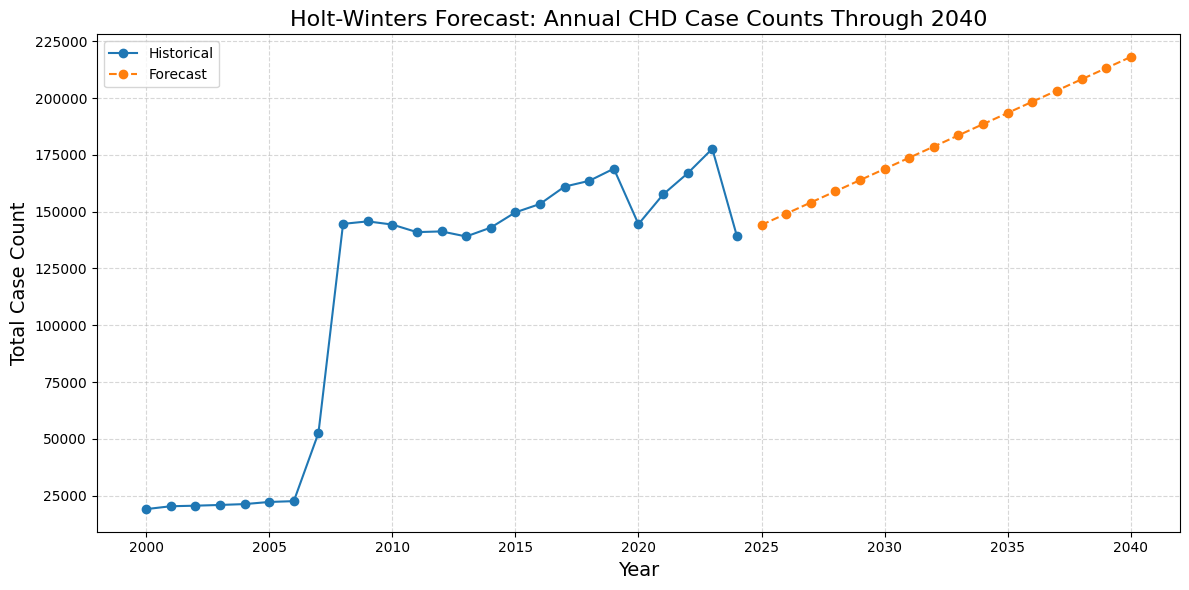

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure 'Year' column is integer
df["Year"] = df["YEAR_QTR"].astype(str).str.extract(r'(\d{4})').astype(int)

# Aggregate count by year
annual_df = df.groupby("Year")["Count"].sum().reset_index()
annual_df.set_index("Year", inplace=True)

# --- Holt-Winters Forecasting (Additive Trend, No Seasonality) ---
model = ExponentialSmoothing(
    annual_df["Count"],
    trend="add",
    seasonal=None,
    initialization_method="estimated"
).fit()

# Forecast for the next 10 years
forecast_years = pd.RangeIndex(start=annual_df.index[-1] + 1, stop=2041)
forecast_values = model.forecast(len(forecast_years))

# Combine historical and forecasted data
forecast_df = pd.DataFrame({
    "Year": forecast_years,
    "Count": forecast_values
}).set_index("Year")

combined_df = pd.concat([annual_df, forecast_df])

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(annual_df.index, annual_df["Count"], marker='o', label="Historical")
plt.plot(forecast_df.index, forecast_df["Count"], marker='o', linestyle='--', label="Forecast")
plt.title("Holt-Winters Forecast: Annual CHD Case Counts Through 2040", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Case Count", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-724333952.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


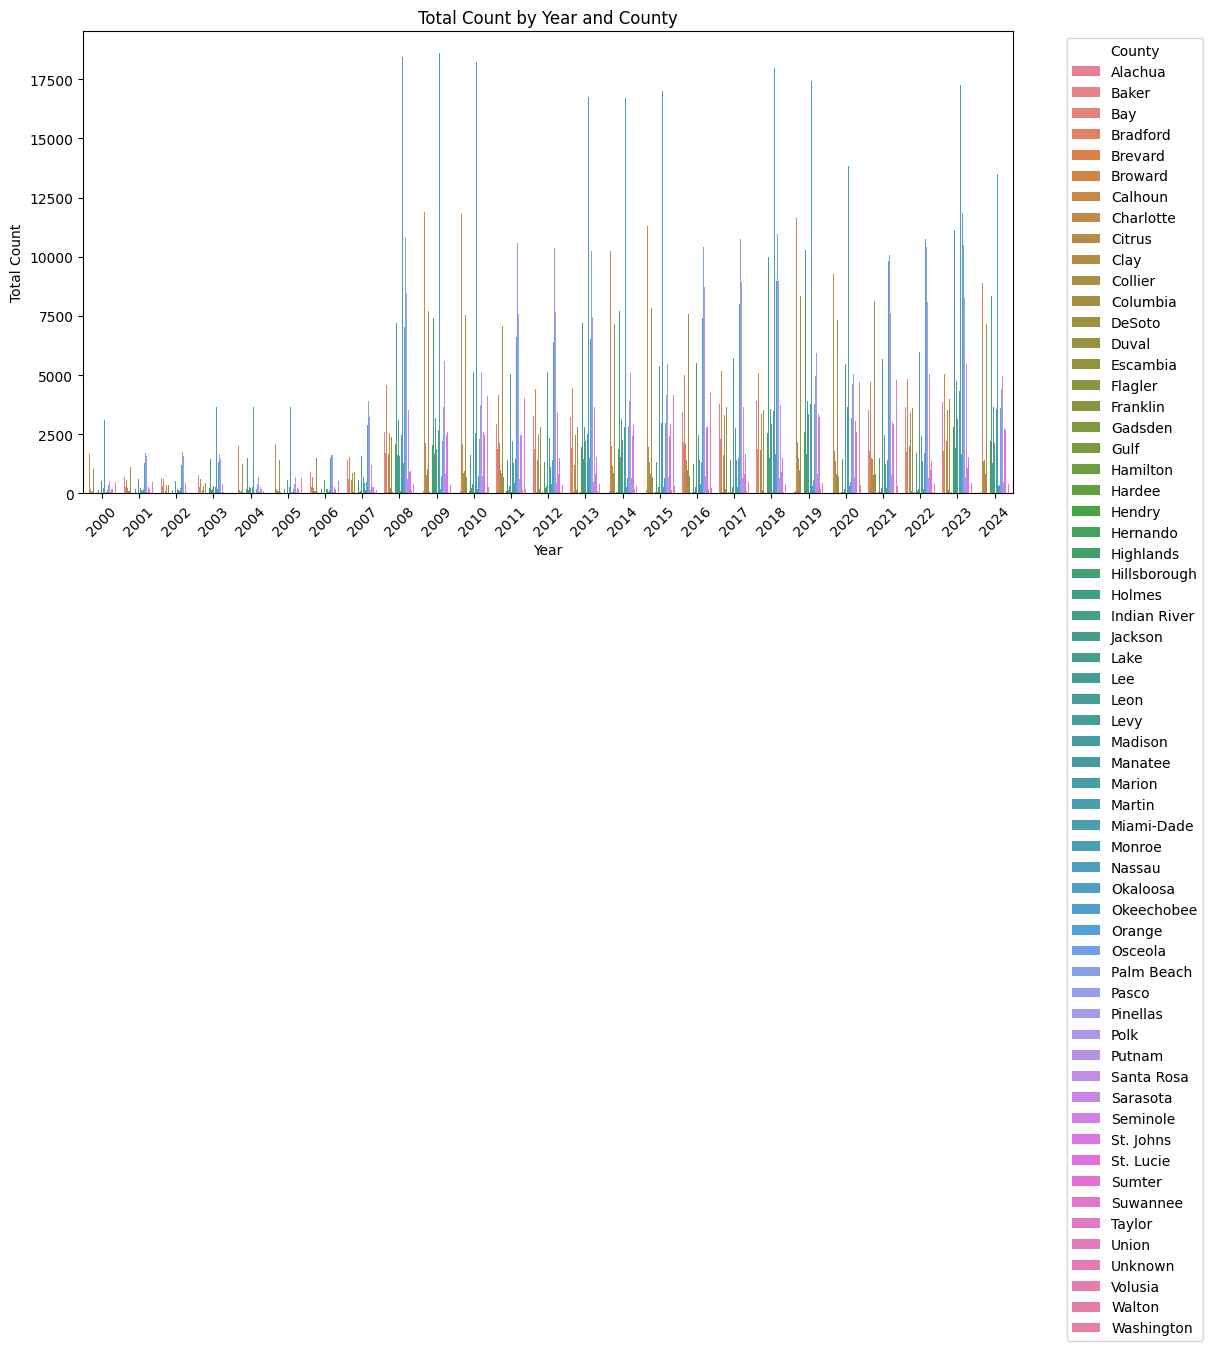

In [10]:
# County dictionary (as provided)
county_dict = {
    1: "Alachua", 2: "Baker", 3: "Bay", 4: "Bradford", 5: "Brevard", 6: "Broward",
    7: "Calhoun", 8: "Charlotte", 9: "Citrus", 10: "Clay", 11: "Collier", 12: "Columbia",
    13: "Miami-Dade", 14: "DeSoto", 15: "Dixie", 16: "Duval", 17: "Escambia", 18: "Flagler",
    19: "Franklin", 20: "Gadsden", 21: "Gilchrist", 22: "Glades", 23: "Gulf", 24: "Hamilton",
    25: "Hardee", 26: "Hendry", 27: "Hernando", 28: "Highlands", 29: "Hillsborough",
    30: "Holmes", 31: "Indian River", 32: "Jackson", 33: "Jefferson", 34: "Lafayette",
    35: "Lake", 36: "Lee", 37: "Leon", 38: "Levy", 39: "Liberty", 40: "Madison",
    41: "Manatee", 42: "Marion", 43: "Martin", 44: "Monroe", 45: "Nassau", 46: "Okaloosa",
    47: "Okeechobee", 48: "Orange", 49: "Osceola", 50: "Palm Beach", 51: "Pasco",
    52: "Pinellas", 53: "Polk", 54: "Putnam", 55: "St. Johns", 56: "St. Lucie",
    57: "Santa Rosa", 58: "Sarasota", 59: "Seminole", 60: "Sumter", 61: "Suwannee",
    62: "Taylor", 63: "Union", 64: "Volusia", 65: "Wakulla", 66: "Walton", 67: "Washington",
    99: "Unknown"
}

# Map FAC_COUNTY codes to names
df['County_Name'] = df['FAC_COUNTY'].map(county_dict)

# Extract year from YEAR_QTR
df['YEAR'] = df['YEAR_QTR'].str[:4]

# Group by year and county name
grouped_df = df.groupby(['County_Name', 'YEAR'])['Count'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='YEAR', y='Count', hue='County_Name')

plt.title('Total Count by Year and County')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


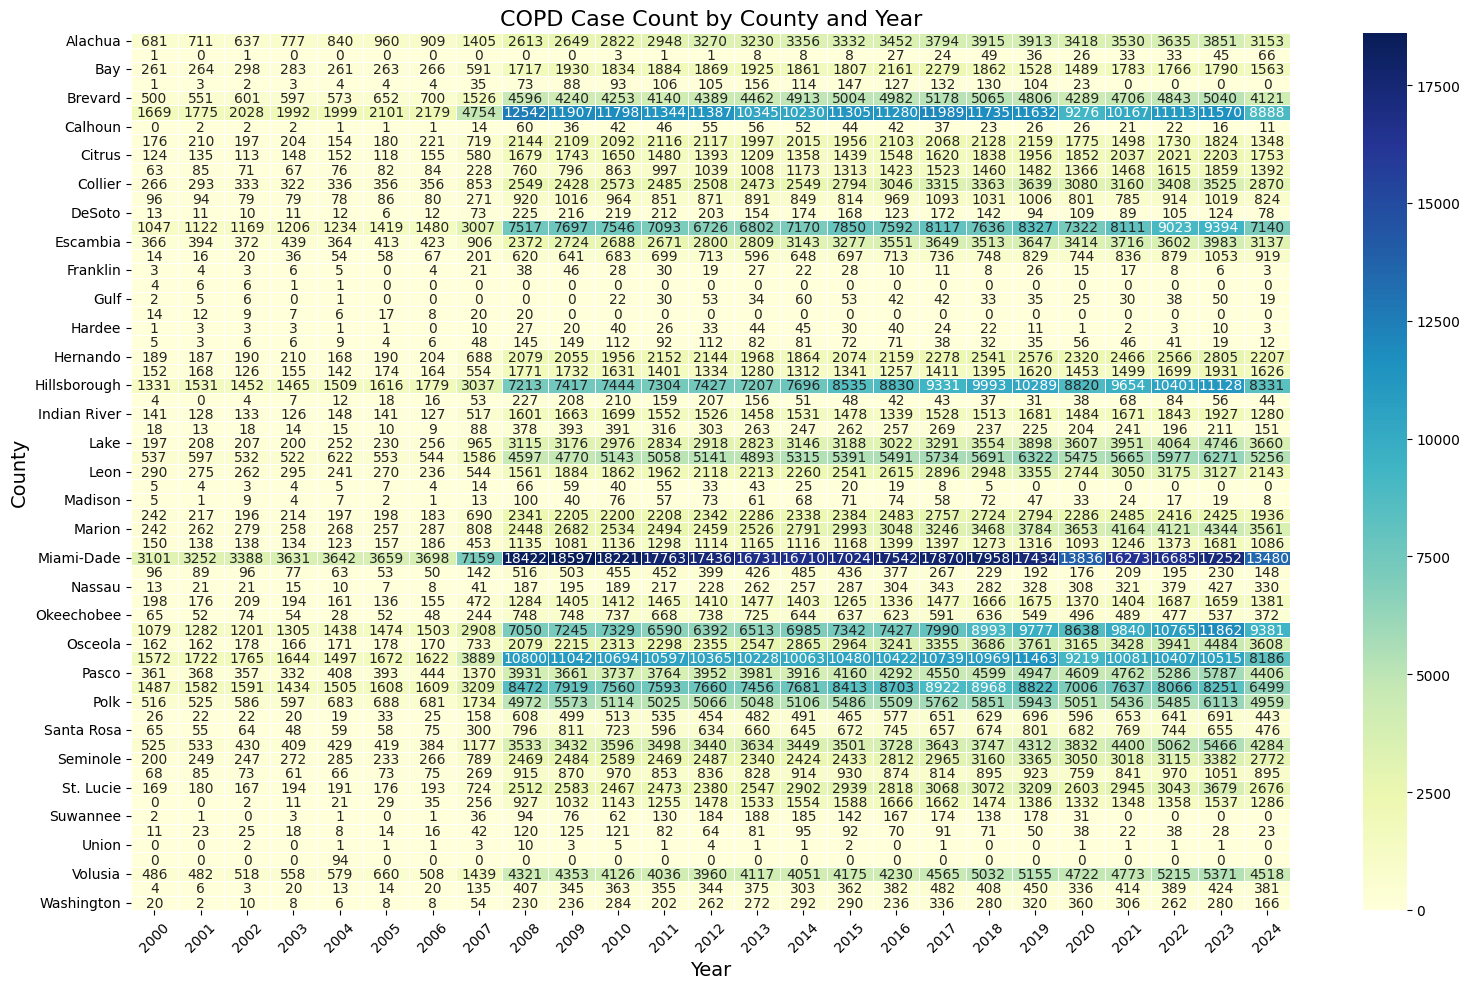

In [11]:
# Step 1: Map FAC_COUNTY to county names
county_dict = {
    1: "Alachua", 2: "Baker", 3: "Bay", 4: "Bradford", 5: "Brevard", 6: "Broward",
    7: "Calhoun", 8: "Charlotte", 9: "Citrus", 10: "Clay", 11: "Collier", 12: "Columbia",
    13: "Miami-Dade", 14: "DeSoto", 15: "Dixie", 16: "Duval", 17: "Escambia", 18: "Flagler",
    19: "Franklin", 20: "Gadsden", 21: "Gilchrist", 22: "Glades", 23: "Gulf", 24: "Hamilton",
    25: "Hardee", 26: "Hendry", 27: "Hernando", 28: "Highlands", 29: "Hillsborough",
    30: "Holmes", 31: "Indian River", 32: "Jackson", 33: "Jefferson", 34: "Lafayette",
    35: "Lake", 36: "Lee", 37: "Leon", 38: "Levy", 39: "Liberty", 40: "Madison",
    41: "Manatee", 42: "Marion", 43: "Martin", 44: "Monroe", 45: "Nassau", 46: "Okaloosa",
    47: "Okeechobee", 48: "Orange", 49: "Osceola", 50: "Palm Beach", 51: "Pasco",
    52: "Pinellas", 53: "Polk", 54: "Putnam", 55: "St. Johns", 56: "St. Lucie",
    57: "Santa Rosa", 58: "Sarasota", 59: "Seminole", 60: "Sumter", 61: "Suwannee",
    62: "Taylor", 63: "Union", 64: "Volusia", 65: "Wakulla", 66: "Walton", 67: "Washington",
    99: "Unknown"
}

# Map county names
df['County_Name'] = df['FAC_COUNTY'].map(county_dict)

# Extract year from YEAR_QTR (e.g., "2023Q1" → "2023")
df['YEAR'] = df['YEAR_QTR'].str[:4]

# Step 2: Create pivot table
pivot_table = df.pivot_table(index='County_Name', columns='YEAR', values='Count', aggfunc='sum', fill_value=0)

# Step 3: Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)

plt.title("COPD Case Count by County and Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("County", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Alachua: MAPE = 8.54%, RMSE = 72.87
Baker: MAPE = 55.46%, RMSE = 3.97


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' 

Bay: MAPE = 12.06%, RMSE = 65.22
Bradford: MAPE = 27.26%, RMSE = 6.85


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Brevard: MAPE = 9.27%, RMSE = 125.73


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Broward: MAPE = 6.72%, RMSE = 323.42
Calhoun: MAPE = 42.66%, RMSE = 4.21


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/

Charlotte: MAPE = 13.56%, RMSE = 73.56
Citrus: MAPE = 11.92%, RMSE = 54.49


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Clay: MAPE = 14.74%, RMSE = 29.57


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Collier: MAPE = 11.06%, RMSE = 93.50
Columbia: MAPE = 18.73%, RMSE = 30.08


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecat

DeSoto: MAPE = 49.74%, RMSE = 11.03
Duval: MAPE = 7.11%, RMSE = 191.01


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")


Escambia: MAPE = 7.87%, RMSE = 69.20
Flagler: MAPE = 18.64%, RMSE = 25.13


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_mo

Franklin: MAPE = 69.19%, RMSE = 3.33
Gadsden: MAPE = 92.96%, RMSE = 1.52


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipython-

Gulf: MAPE = 44.95%, RMSE = 3.72
Hamilton: MAPE = 102.45%, RMSE = 3.85


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/li

Hardee: MAPE = 70.42%, RMSE = 3.38
Hendry: MAPE = 42.74%, RMSE = 6.62


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipython-

Hernando: MAPE = 10.62%, RMSE = 70.29
Highlands: MAPE = 14.34%, RMSE = 64.32


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version,

Hillsborough: MAPE = 7.73%, RMSE = 201.10
Holmes: MAPE = 41.63%, RMSE = 9.17


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Indian River: MAPE = 12.49%, RMSE = 53.26
Jackson: MAPE = 28.49%, RMSE = 13.95


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/

Lake: MAPE = 10.56%, RMSE = 100.97
Lee: MAPE = 10.25%, RMSE = 157.77


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Leon: MAPE = 11.23%, RMSE = 60.35


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Levy: MAPE = 61.27%, RMSE = 4.24
Madison: MAPE = 53.79%, RMSE = 5.84


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipython-

Manatee: MAPE = 11.27%, RMSE = 80.40
Marion: MAPE = 8.57%, RMSE = 75.19


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")


Martin: MAPE = 13.74%, RMSE = 44.59


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Miami-Dade: MAPE = 6.83%, RMSE = 464.16


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Monroe: MAPE = 19.81%, RMSE = 18.93


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Nassau: MAPE = 39.52%, RMSE = 9.82


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Okaloosa: MAPE = 12.26%, RMSE = 45.43
Okeechobee: MAPE = 26.79%, RMSE = 27.95


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version,

Orange: MAPE = 7.40%, RMSE = 178.42
Osceola: MAPE = 11.25%, RMSE = 75.65


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")


Palm Beach: MAPE = 7.87%, RMSE = 322.24


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")


Pasco: MAPE = 9.12%, RMSE = 123.98
Pinellas: MAPE = 7.43%, RMSE = 227.83


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Polk: MAPE = 8.29%, RMSE = 151.76
Putnam: MAPE = 31.03%, RMSE = 21.05


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version,

Santa Rosa: MAPE = 15.18%, RMSE = 27.78
Sarasota: MAPE = 9.72%, RMSE = 128.81
Seminole: MAPE = 10.78%, RMSE = 75.05


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


St. Johns: MAPE = 16.23%, RMSE = 30.59
St. Lucie: MAPE = 10.67%, RMSE = 79.90


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Sumter: MAPE = 18.25%, RMSE = 40.40
Suwannee: MAPE = 23.93%, RMSE = 10.15


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/

Taylor: MAPE = 56.82%, RMSE = 6.88
Union: MAPE = 56.47%, RMSE = 1.03
Skipping Unknown – insufficient data.


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipython-

Volusia: MAPE = 9.39%, RMSE = 126.50
Walton: MAPE = 39.85%, RMSE = 17.41


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/

Washington: MAPE = 39.11%, RMSE = 19.03


/tmp/ipython-input-3897907026.py:54: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


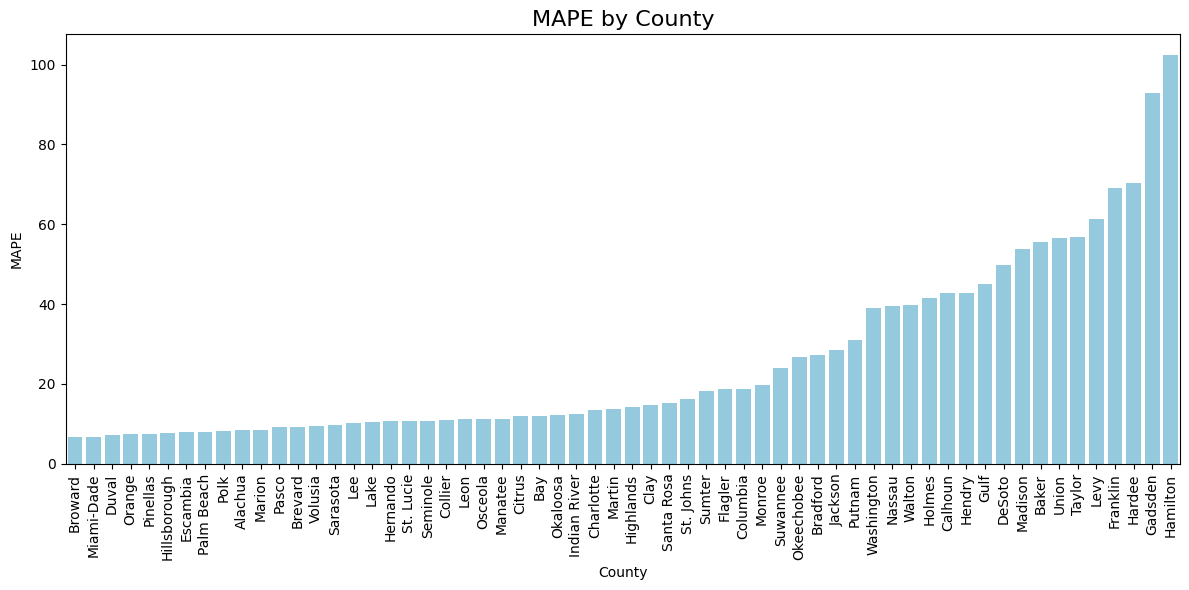

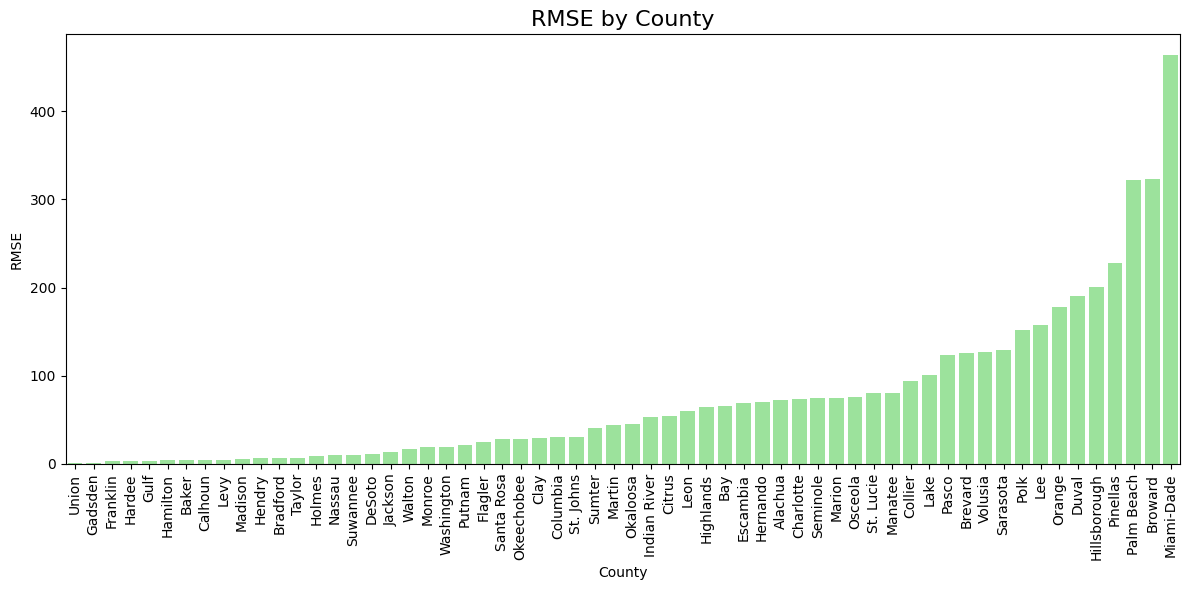

✅ Metrics exported to county_forecast_metrics.xlsx


In [12]:
# --- Prepare Data ---

# Convert YEAR_QTR to quarterly timestamp
df["YEAR_QTR"] = pd.PeriodIndex(df["YEAR_QTR"].astype(str).str.replace(" ", "-"), freq="Q")
df["Date"] = df["YEAR_QTR"].dt.to_timestamp()

# Map county codes to names
df["County_Name"] = df["FAC_COUNTY"].map(county_dict)

# Aggregate by county and quarter
case_counts = df.groupby(["County_Name", "Date"])["Count"].sum().reset_index()
case_counts.rename(columns={"Count": "Case_Count"}, inplace=True)

# --- Step 4: Forecasting with Holt–Winters (Seasonal) + Model Evaluation + Visualization + Export ---
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

forecast_df_list = []
metrics_list = []  # Store MAPE & RMSE for each county

for county in case_counts["County_Name"].dropna().unique():
    county_data = case_counts[case_counts["County_Name"] == county].set_index("Date").sort_index()

    # Skip counties with too little data
    if len(county_data) < 8:
        print(f"Skipping {county} – insufficient data.")
        continue

    try:
        # --- Fit Holt–Winters model ---
        model = ExponentialSmoothing(
            county_data["Case_Count"],
            trend="add",
            seasonal="add",
            seasonal_periods=4,
            initialization_method="legacy-heuristic"
        ).fit()

        # --- Evaluate model performance on historical data ---
        y_true = county_data["Case_Count"]
        y_pred = model.fittedvalues

        mape = mean_absolute_percentage_error(y_true, y_pred) * 100
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))

        print(f"{county}: MAPE = {mape:.2f}%, RMSE = {rmse:.2f}")

        metrics_list.append({"County": county, "MAPE": mape, "RMSE": rmse})

        # --- Forecast through 2040 ---
        last_date = county_data.index[-1]
        future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
        forecast = model.forecast(len(future_index))
        forecast[forecast < 0] = 0  # Clamp negatives to 0

        hist_df = pd.DataFrame({
            "Date": county_data.index,
            "Case_Count": county_data["Case_Count"].values,
            "County": county
        })

        forecast_df = pd.DataFrame({
            "Date": future_index,
            "Case_Count": forecast.values,
            "County": county
        })

        forecast_df_list.extend([hist_df, forecast_df])

    except Exception as e:
        print(f"Error forecasting {county}: {e}")
        continue

# --- Combine metrics ---
metrics_df = pd.DataFrame(metrics_list)

# --- Visualization ---
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df.sort_values("MAPE"), x="County", y="MAPE", color="skyblue")
plt.title("MAPE by County", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df.sort_values("RMSE"), x="County", y="RMSE", color="lightgreen")
plt.title("RMSE by County", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# --- Export metrics to Excel ---
output_path = "county_forecast_metrics.xlsx"
metrics_df.to_excel(output_path, index=False)
print(f"✅ Metrics exported to {output_path}")


In [13]:
# Compute total historical and fitted values
overall_data = case_counts.groupby("Date")["Case_Count"].sum().reset_index()

model = ExponentialSmoothing(
    overall_data["Case_Count"],
    trend="add",
    seasonal="add",
    seasonal_periods=4,
    initialization_method="legacy-heuristic"
).fit()

y_true = overall_data["Case_Count"]
y_pred = model.fittedvalues

overall_mape = mean_absolute_percentage_error(y_true, y_pred) * 100
overall_rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Overall MAPE: {overall_mape:.2f}%")
print(f"Overall RMSE: {overall_rmse:.2f}")


Overall MAPE: 5.64%
Overall RMSE: 3922.71


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-2944591757.py:47: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipython-input-2944591757.py:47: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_mo

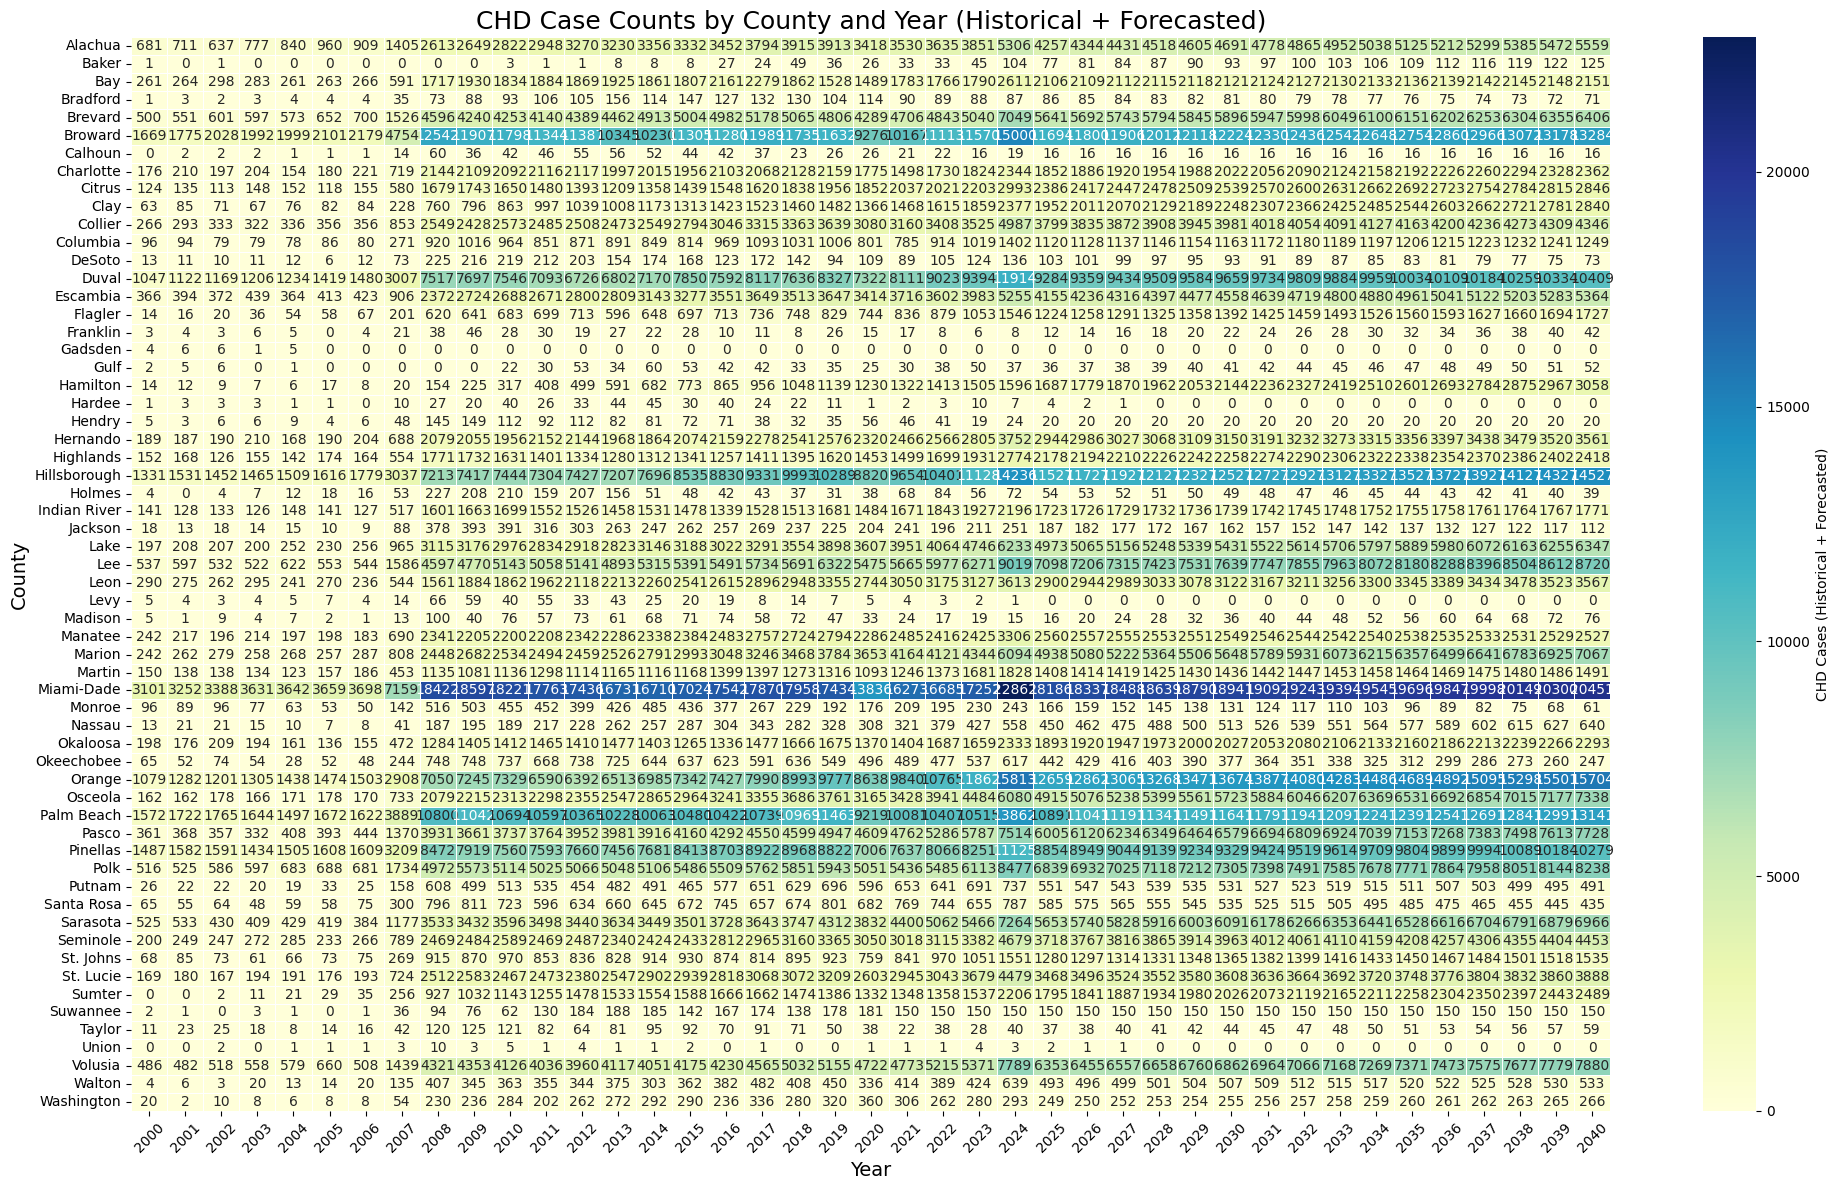

In [14]:
# --- Step 2: Clean and preprocess ---
# Convert YEAR_QTR to quarterly timestamp
df["YEAR_QTR"] = pd.PeriodIndex(df["YEAR_QTR"].astype(str).str.replace(" ", "-"), freq="Q")
df["Date"] = df["YEAR_QTR"].dt.to_timestamp()

# Map FAC_COUNTY to readable names
county_dict = {
    1: "Alachua", 2: "Baker", 3: "Bay", 4: "Bradford", 5: "Brevard", 6: "Broward",
    7: "Calhoun", 8: "Charlotte", 9: "Citrus", 10: "Clay", 11: "Collier", 12: "Columbia",
    13: "Miami-Dade", 14: "DeSoto", 15: "Dixie", 16: "Duval", 17: "Escambia", 18: "Flagler",
    19: "Franklin", 20: "Gadsden", 21: "Gilchrist", 22: "Glades", 23: "Gulf", 24: "Hamilton",
    25: "Hardee", 26: "Hendry", 27: "Hernando", 28: "Highlands", 29: "Hillsborough",
    30: "Holmes", 31: "Indian River", 32: "Jackson", 33: "Jefferson", 34: "Lafayette",
    35: "Lake", 36: "Lee", 37: "Leon", 38: "Levy", 39: "Liberty", 40: "Madison",
    41: "Manatee", 42: "Marion", 43: "Martin", 44: "Monroe", 45: "Nassau", 46: "Okaloosa",
    47: "Okeechobee", 48: "Orange", 49: "Osceola", 50: "Palm Beach", 51: "Pasco",
    52: "Pinellas", 53: "Polk", 54: "Putnam", 55: "St. Johns", 56: "St. Lucie",
    57: "Santa Rosa", 58: "Sarasota", 59: "Seminole", 60: "Sumter", 61: "Suwannee",
    62: "Taylor", 63: "Union", 64: "Volusia", 65: "Wakulla", 66: "Walton", 67: "Washington",
    99: "Unknown"
}
df["County_Name"] = df["FAC_COUNTY"].map(county_dict)

# --- Step 3: Aggregate quarterly counts by county ---
case_counts = df.groupby(["County_Name", "Date"])["Count"].sum().reset_index()
case_counts.rename(columns={"Count": "Case_Count"}, inplace=True)

# --- Step 4: Forecasting with Holt-Winters (Seasonal) ---
forecast_df_list = []

for county in case_counts["County_Name"].dropna().unique():
    county_data = case_counts[case_counts["County_Name"] == county].set_index("Date").sort_index()

    if len(county_data) < 8:
        continue

    try:
        model = ExponentialSmoothing(
            county_data["Case_Count"],
            trend="add",
            seasonal="add",
            seasonal_periods=4,
            initialization_method="legacy-heuristic"
        ).fit()

        last_date = county_data.index[-1]
        future_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(), end="2040-12-31", freq="Q")
        forecast = model.forecast(len(future_index))
        forecast[forecast < 0] = 0  # Clamp negatives to 0

        hist_df = pd.DataFrame({
            "Date": county_data.index,
            "Case_Count": county_data["Case_Count"].values,
            "County": county
        })

        forecast_df = pd.DataFrame({
            "Date": future_index,
            "Case_Count": forecast.values,
            "County": county
        })

        forecast_df_list.extend([hist_df, forecast_df])

    except Exception as e:
        print(f"Error forecasting {county}: {e}")
        continue

# --- Step 5: Combine and pivot for heatmap ---
forecast_combined = pd.concat(forecast_df_list)
forecast_combined["Year"] = forecast_combined["Date"].dt.year

# Create pivot table: County vs Year
heatmap_data = forecast_combined.pivot_table(
    index="County",
    columns="Year",
    values="Case_Count",
    aggfunc="sum",
    fill_value=0
)

# --- Step 6: Plot the heatmap ---
plt.figure(figsize=(20, 12))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "CHD Cases (Historical + Forecasted)"}
)

plt.title("CHD Case Counts by County and Year (Historical + Forecasted)", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("County", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [16]:
# Step 1: Load your dataset
df = pd.read_csv("/content/CHD Summarized Inpatient Data v4-2 2.csv")

# Step 2: Map FAC_COUNTY to County_Name
county_dict = {
    1: "Alachua", 2: "Baker", 3: "Bay", 4: "Bradford", 5: "Brevard", 6: "Broward",
    7: "Calhoun", 8: "Charlotte", 9: "Citrus", 10: "Clay", 11: "Collier", 12: "Columbia",
    13: "Miami-Dade", 14: "DeSoto", 15: "Dixie", 16: "Duval", 17: "Escambia", 18: "Flagler",
    19: "Franklin", 20: "Gadsden", 21: "Gilchrist", 22: "Glades", 23: "Gulf", 24: "Hamilton",
    25: "Hardee", 26: "Hendry", 27: "Hernando", 28: "Highlands", 29: "Hillsborough",
    30: "Holmes", 31: "Indian River", 32: "Jackson", 33: "Jefferson", 34: "Lafayette",
    35: "Lake", 36: "Lee", 37: "Leon", 38: "Levy", 39: "Liberty", 40: "Madison",
    41: "Manatee", 42: "Marion", 43: "Martin", 44: "Monroe", 45: "Nassau", 46: "Okaloosa",
    47: "Okeechobee", 48: "Orange", 49: "Osceola", 50: "Palm Beach", 51: "Pasco",
    52: "Pinellas", 53: "Polk", 54: "Putnam", 55: "St. Johns", 56: "St. Lucie",
    57: "Santa Rosa", 58: "Sarasota", 59: "Seminole", 60: "Sumter", 61: "Suwannee",
    62: "Taylor", 63: "Union", 64: "Volusia", 65: "Wakulla", 66: "Walton", 67: "Washington",
    99: "Unknown"
}
df["County_Name"] = df["FAC_COUNTY"].map(county_dict)

# Step 3: Convert YEAR_QTR to datetime, extract year
df["YEAR_QTR"] = pd.PeriodIndex(df["YEAR_QTR"].astype(str).str.replace(" ", "-"), freq="Q")
df["Year"] = df["YEAR_QTR"].dt.year

# Step 4: Aggregate by Year, County, and Age Group
grouped_df = df.groupby(["Year", "County_Name", "AGE_GROUP"])["Count"].sum().reset_index()

# Step 5: Forecast for each County + Age_Group
forecast_list = []

for (county, age_group), group in grouped_df.groupby(["County_Name", "AGE_GROUP"]):
    series = group.set_index("Year")["Count"].sort_index()

    if len(series) < 5:
        continue

    try:
        model = ExponentialSmoothing(series, trend="add", initialization_method="estimated").fit()
        future_years = range(series.index.max() + 1, 2041)
        forecast = model.forecast(len(future_years))

        for year, count in zip(future_years, forecast):
            forecast_list.append({
                "County_Name": county,
                "AGE_GROUP": age_group,
                "Year": year,
                "Forecasted_Count": max(0, round(count))
            })
    except Exception as e:
        print(f"Skipped {county}-{age_group}: {e}")

# Step 6: Convert to DataFrame and export
forecast_df = pd.DataFrame(forecast_list)

# Optional: Save to CSV
forecast_df.to_csv("Forecasted_CHD_By_County_Year_AgeGroup_2024_to_2040.csv", index=False)

print("✅ Forecast completed and saved to Forecasted_CHD_By_County_Year_AgeGroup_2024_to_2040.csv")


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an in

✅ Forecast completed and saved to Forecasted_CHD_By_County_Year_AgeGroup_2024_to_2040.csv


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_pred